# Assignment 3: Data Visualization

To prepare, you'll need to download [the IMDb data set from Kaggle](https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset?select=IMDb+movies.csv), upload it to your Colab notebook, and unzip it. That should give you four CSV files. 

## 1. Make a line chart, with Pandas `.plot()`, showing average movie ratings (`avg_vote`) according to year (`year`). (You may need to clean the `year` column for this to work.)


In [1]:
!unzip archive.zip

Archive:  archive.zip
  inflating: IMDb movies.csv         
  inflating: IMDb names.csv          
  inflating: IMDb ratings.csv        
  inflating: IMDb title_principals.csv  


In [2]:
import pandas as pd
import altair as alt

In [3]:
movies = pd.read_csv('IMDb movies.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
ratings = pd.read_csv('IMDb ratings.csv')

In [5]:
def cleanYear(year): 
    if type(year) == str and year.startswith('TV Movie'): 
        year = year[-4:]
    return int(year)

In [6]:
movies['cleanYear'] = movies['year'].apply(cleanYear)

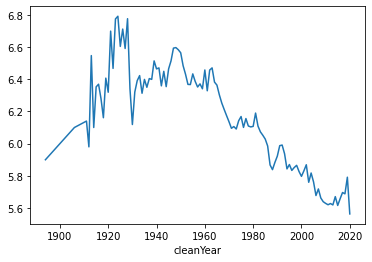

In [7]:
movies.groupby('cleanYear')['avg_vote'].mean().plot()

## 2. Make a bar chart, using Altair, showing (a) ratings among ~18-year-old users, and (b) ratings among ~45-year-old users, for several films with a high discrepancy between these two values.  

In [8]:
df = pd.merge(movies, ratings)

In [9]:
df.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics', 'cleanYear',
       'weighted_average_vote', 'total_votes', 'mean_vote', 'median_vote',
       'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6', 'votes_5',
       'votes_4', 'votes_3', 'votes_2', 'votes_1', 'allgenders_0age_avg_vote',
       'allgenders_0age_votes', 'allgenders_18age_avg_vote',
       'allgenders_18age_votes', 'allgenders_30age_avg_vote',
       'allgenders_30age_votes', 'allgenders_45age_avg_vote',
       'allgenders_45age_votes', 'males_allages_avg_vote',
       'males_allages_votes', 'males_0age_avg_vote', 'males_0age_votes',
       'males_18age_avg_vote', 'males_18age_votes', 'males_30age_avg_vote',
       'males

In [10]:
df['ageDiscrepancy'] = df['allgenders_18age_avg_vote'] - df['allgenders_45age_avg_vote']

In [11]:
subset = df.sort_values('ageDiscrepancy', ascending=False).head(10)[['allgenders_18age_avg_vote', 'allgenders_45age_avg_vote', 'title']]

In [12]:
subsetTidy = subset.melt(id_vars='title')

In [13]:
subsetTidy.columns

Index(['title', 'variable', 'value'], dtype='object')

In [14]:
subsetTidy.columns = ['title', 'age', 'value']

In [15]:
def cleanAge(age): 
    return int(age[11:13])

In [16]:
subsetTidy['age'] = subsetTidy['age'].apply(cleanAge)

In [17]:
alt.Chart(subsetTidy).mark_bar().encode(x='title:N', y='value:Q', color='age:N')

alt.Chart(...)


## 3. Make an interactive scatter plot, using Altair, showing the correlation between a movie's budget, on one axis, and its worldwide gross income on another. What movies have very low budgets and very high income? (You may want to annotate points with movie titles, or add movie titles to the hover text of points.) 

In [18]:
smallDf = df.head(50)

In [19]:
def cleanBudget(budget): 
    if type(budget) == str and '$' in budget: 
        budget = int(budget[1:])
    else: 
        budget = 0
    return budget

df['cleanBudget'] = df['budget'].apply(cleanBudget)

In [20]:
df['cleanIncome'] = df['worlwide_gross_income'].apply(cleanBudget)

In [21]:
subset = df[df['cleanIncome'] > 100000][df['cleanIncome'] > 100000]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [22]:
alt.Chart(subset.head(50)).mark_circle().encode(x='cleanBudget:Q', y='cleanIncome:Q', tooltip='title').interactive()

alt.Chart(...)